In [21]:
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torchvision.io import read_image
from torch.utils.data import Dataset

In [17]:
class LeafImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_trainsform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_trainsform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    

In [18]:
LeafTrain = LeafImageDataset('./train.csv', '')

In [20]:
imaget,labelt = LeafTrain.__getitem__(1)

label of the image: maclura_pomifera


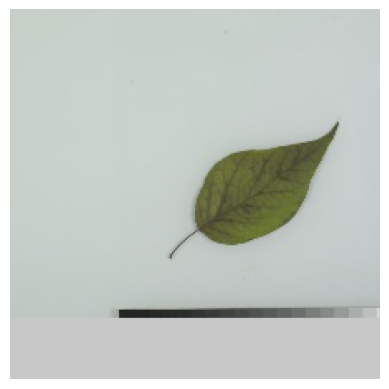

In [25]:
plt.imshow(imaget.permute(1,2,0))
plt.axis('off')
print(f'label of the image: {labelt}')